In [1]:
import scanpy as sc
import pandas as pd
import numpy as np

In [2]:
adata = sc.read_h5ad('../data/peng/PRJCA001063_CRC_besca2.raw.h5ad')
adata

AnnData object with n_obs × n_vars = 57530 × 18008
    obs: 'CELL', 'CONDITION', 'Patient', 'Type', 'Cell_type'
    var: 'ENSEMBL', 'SYMBOL'

In [3]:
adata.obs

,CELL,CONDITION,Patient,Type,Cell_type
T1_AAACCTGAGATGTCGG,T1_AAACCTGAGATGTCGG,T,T1,T,Fibroblast cell
T1_AAACGGGGTCATGCAT,T1_AAACGGGGTCATGCAT,T,T1,T,Stellate cell
T1_AAAGATGCATGTTGAC,T1_AAAGATGCATGTTGAC,T,T1,T,Macrophage cell
T1_AAAGATGGTCGAGTTT,T1_AAAGATGGTCGAGTTT,T,T1,T,Macrophage cell
T1_AAAGATGGTCTCTCTG,T1_AAAGATGGTCTCTCTG,T,T1,T,Endothelial cell
...,...,...,...,...,...
N11_TTTGCGCGTGCGCTTG,N11_TTTGCGCGTGCGCTTG,N,N11,N,Endothelial cell
N11_TTTGGTTCATTGAGCT,N11_TTTGGTTCATTGAGCT,N,N11,N,Acinar cell
N11_TTTGGTTGTCCGACGT,N11_TTTGGTTGTCCGACGT,N,N11,N,Ductal cell type 1
N11_TTTGTCAAGGCTAGCA,N11_TTTGTCAAGGCTAGCA,N,N11,N,Acinar cell


In [4]:
# ## we just want the tumor
# adata = adata[adata.obs['CONDITION']=='T']
# adata

In [6]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

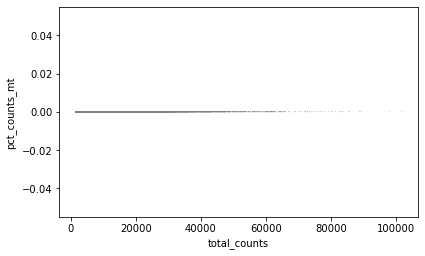

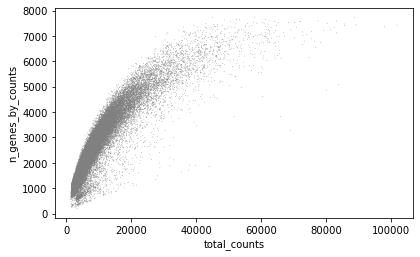

In [7]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [5]:
len(set(adata.obs['Patient']))

35

In [6]:
set(adata.X[:1].toarray().flatten())

{0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 37.0,
 38.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 63.0,
 65.0,
 66.0,
 67.0,
 69.0,
 70.0,
 75.0,
 82.0,
 86.0,
 88.0,
 91.0,
 95.0,
 100.0,
 104.0,
 109.0,
 142.0,
 176.0,
 190.0,
 198.0}

In [9]:
counts = pd.DataFrame(data=adata.X.toarray(), index=adata.obs.index.to_list(),
                     columns=adata.var.index.to_list())
counts

,LINC00115,FAM41C,SAMD11,NOC2L,KLHL17,PLEKHN1,HES4,ISG15,AGRN,RNF223,...,GPR142,TMEM235,GALR1,DEFB132,SMIM17,NAV2-AS2,MIR3179-1,ZNF32-AS1,RXYLT1-AS1,KRT222
T1_AAACCTGAGATGTCGG,0.0,0.0,0.0,1.0,0.0,0.0,3.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T1_AAACGGGGTCATGCAT,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T1_AAAGATGCATGTTGAC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T1_AAAGATGGTCGAGTTT,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T1_AAAGATGGTCTCTCTG,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T24_TTTGGTTGTGTTGAGG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T24_TTTGGTTTCCAGAGGA,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T24_TTTGGTTTCCTGCTTG,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
T24_TTTGTCAAGATGTCGG,0.0,0.0,0.0,2.0,0.0,0.0,2.0,8.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
metadata = adata.obs.copy()
metadata.index.name = 'barcode'
metadata.to_csv('../data/peng/metadata.tsv', sep='\t')

In [12]:
counts.index.name = 'barcode'
counts.to_csv('../data/peng/counts.tsv', sep='\t')